<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Type-of-Variables-and-missing-values" data-toc-modified-id="Type-of-Variables-and-missing-values-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Type of Variables and missing values</a></span></li><li><span><a href="#Cleaning-the-essay" data-toc-modified-id="Cleaning-the-essay-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cleaning the essay</a></span></li><li><span><a href="#Data-visualization" data-toc-modified-id="Data-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data visualization</a></span></li><li><span><a href="#TF-IDF-features" data-toc-modified-id="TF-IDF-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>TF-IDF features</a></span></li><li><span><a href="#Feature-scaling-(Y)" data-toc-modified-id="Feature-scaling-(Y)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature scaling (Y)</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Support-Vector-Regression" data-toc-modified-id="Support-Vector-Regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Support Vector Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Artificial-Neural-Network" data-toc-modified-id="Artificial-Neural-Network-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Artificial Neural Network</a></span></li></ul></div>

In [1]:
import pandas as pd
import re
import numpy as np
import scipy as sp
from textblob import TextBlob
from textblob import Word
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr as Spearman
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv("C:\\Users\\mohammad\\Desktop\\GlobalEnglish\\khalili\\data.csv")
df.head()

,Unnamed: 0,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,*_# of words_*,*_# of sentences_*,*_Average lenght of sentences_*,*_# of large words_*,*_Sentiment_Polarity_*,*_# of Nouns_*,*_# of Verbs_*,*_# of Adverbs_*,*_# of Adjectives_*,*_# of grammer mistakes_*,*_# of spelling mistakes*
0,0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,343.0,16.0,21.125000,59.0,0.310471,84.0,68.0,26.0,20.0,11.0,21.0
1,1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,422.0,20.0,20.950000,81.0,0.274000,114.0,85.0,20.0,21.0,19.0,20.0
2,2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,283.0,14.0,19.928571,52.0,0.340393,86.0,53.0,18.0,19.0,9.0,5.0
3,3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0,527.0,27.0,19.407407,131.0,0.266828,200.0,98.0,30.0,52.0,35.0,22.0
4,4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0,470.0,30.0,15.500000,87.0,0.199684,116.0,87.0,39.0,30.0,17.0,25.0


# Type of Variables and missing values

In [3]:
print("Number of rows: ", len(df), "\n\n\n")
print("Data types \n---------\n\n", df.dtypes, "\n\n\n")
print('Number of nulls : \n---------\n\n', df.isnull().sum())

Number of rows:  12978 



Data types 
---------

 Unnamed: 0                           int64
essay_id                             int64
essay_set                            int64
essay                               object
rater1_domain1                     float64
rater2_domain1                     float64
domain1_score                      float64
*_# of words_*                     float64
*_# of sentences_*                 float64
*_Average lenght of sentences_*    float64
*_# of large words_*               float64
*_Sentiment_Polarity_*             float64
*_# of Nouns_*                     float64
*_# of Verbs_*                     float64
*_# of Adverbs_*                   float64
*_# of Adjectives_*                float64
*_# of grammer mistakes_*          float64
*_# of spelling mistakes*          float64
dtype: object 



Number of nulls : 
---------

 Unnamed: 0                         0
essay_id                           0
essay_set                          0
essay          

In [4]:
df[df['rater1_domain1'].isnull()] 

,Unnamed: 0,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,*_# of words_*,*_# of sentences_*,*_Average lenght of sentences_*,*_# of large words_*,*_Sentiment_Polarity_*,*_# of Nouns_*,*_# of Verbs_*,*_# of Adverbs_*,*_# of Adjectives_*,*_# of grammer mistakes_*,*_# of spelling mistakes*
6973,6973,10534,4,"When they come back, Saeng vowed silently to h...",NaN,NaN,NaN,101.0,4.0,24.5,15.0,-0.005,24.0,18.0,6.0,3.0,5.0,5.0


Since there is only one missing value, I prefer to drop it instead of applying imputation methods.

In [5]:
df = df.drop(6973)
df = df.reset_index()
df = df.drop('index', axis = 1)

# Cleaning the essay

In [6]:

def cleanData_(row):
    a = row['essay']
    a = re.sub('@[a-z A-Z 0-9]+', ' ', a)
    return a

df ['essay_clean'] = df.apply(cleanData_, axis = 1)
df.head()

,Unnamed: 0,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,*_# of words_*,*_# of sentences_*,*_Average lenght of sentences_*,*_# of large words_*,*_Sentiment_Polarity_*,*_# of Nouns_*,*_# of Verbs_*,*_# of Adverbs_*,*_# of Adjectives_*,*_# of grammer mistakes_*,*_# of spelling mistakes*,essay_clean
0,0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,343.0,16.0,21.125000,59.0,0.310471,84.0,68.0,26.0,20.0,11.0,21.0,"Dear local newspaper, I think effects computer..."
1,1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,422.0,20.0,20.950000,81.0,0.274000,114.0,85.0,20.0,21.0,19.0,20.0,"Dear , I believe that using computers will b..."
2,2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,283.0,14.0,19.928571,52.0,0.340393,86.0,53.0,18.0,19.0,9.0,5.0,"Dear, , but not everyone agrees that this b..."
3,3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0,527.0,27.0,19.407407,131.0,0.266828,200.0,98.0,30.0,52.0,35.0,22.0,"Dear Local Newspaper, . In some cases this is..."
4,4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0,470.0,30.0,15.500000,87.0,0.199684,116.0,87.0,39.0,30.0,17.0,25.0,"Dear , I know having computers has a positive..."


# Data visualization

To make this jupyter a liitle concise, I just plot some figures for essay set 1. We can plot other figures in the same way. 

Text(0,0.5,'Score')

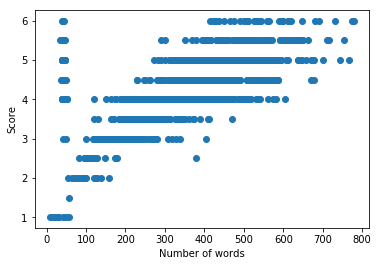

In [7]:
df1 = df[df['essay_set'] == 1]
plt.scatter(df1['*_# of words_*'].values, df1['domain1_score'].values/2,  marker="o")
plt.xlabel('Number of words')
plt.ylabel('Score')

Text(0,0.5,'Score')

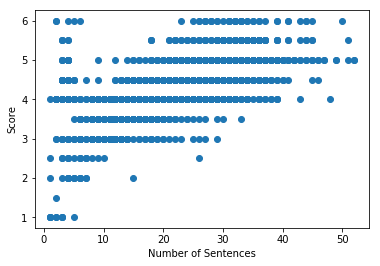

In [8]:
plt.scatter(df1['*_# of sentences_*'].values, df1['domain1_score'].values/2,  marker="o")
plt.xlabel('Number of Sentences')
plt.ylabel('Score')

Text(0,0.5,'Score')

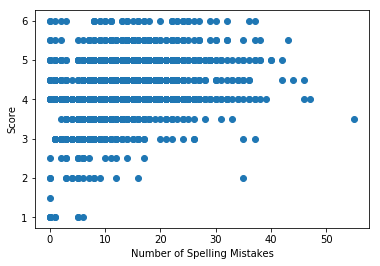

In [9]:
plt.scatter(df1['*_# of spelling mistakes*'].values, df1['domain1_score'].values/2,  marker="o")
plt.xlabel('Number of Spelling Mistakes')
plt.ylabel('Score')

Text(0,0.5,'Score')

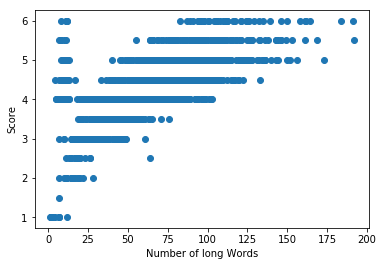

In [10]:
plt.scatter(df1['*_# of large words_*'].values, df1['domain1_score'].values/2,  marker="o")
plt.xlabel('Number of long Words')
plt.ylabel('Score')

Text(0.5,0,'Score')

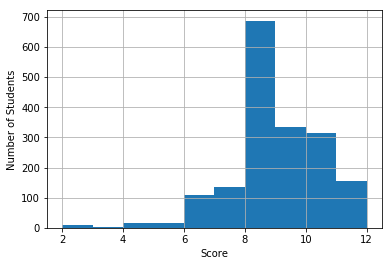

In [11]:
fig=df1['domain1_score'].hist(bins=10)
fig.set_ylabel('Number of Students')
fig.set_xlabel('Score')

We can find a model for each essay set. Note that I want to apply regression algorithms but we can apply classification
algorithms as well especially for essay set 1-6. I mean when the score is bounded by 12 we can assume that the score is 
in one of the 13 classes. 

# TF-IDF features

In [12]:
df=df.rename(columns = {'essay':'essay_*'})



# TF_IDF features for each set is computed and then is concateneted to the existing dataframe.
for essay_set_group, dataframe in df.groupby('essay_set'):
    if (essay_set_group == 1):
        df_1 = dataframe
        vectorizer_1 = TfidfVectorizer(stop_words = 'english')
        vec_df = vectorizer_1.fit_transform(df_1['essay_clean'])
        df_11 = pd.DataFrame(vec_df.toarray(), columns=vectorizer_1.get_feature_names())
        df_1 = df_1.reset_index()
        df_1 = pd.concat([df_1, df_11], axis=1)
    
    
    
    elif (essay_set_group == 2):
        df_2 = dataframe
        vectorizer_2 = TfidfVectorizer(stop_words = 'english')
        vec_df = vectorizer_2.fit_transform(df_2['essay_clean'])
        df_21 = pd.DataFrame(vec_df.toarray(), columns=vectorizer_2.get_feature_names())
        df_2 = df_2.reset_index()
        df_2 = pd.concat([df_2, df_21], axis=1)
    
    
    elif (essay_set_group == 3):
        df_3 = dataframe
        vectorizer_3 = TfidfVectorizer(stop_words = 'english')
        vec_df = vectorizer_3.fit_transform(df_3['essay_clean'])
        df_31 = pd.DataFrame(vec_df.toarray(), columns=vectorizer_3.get_feature_names())
        df_3 = df_3.reset_index()
        df_3 = pd.concat([df_3, df_31], axis=1)
    
    
    elif (essay_set_group == 4):
        df_4 = dataframe
        vectorizer_4 = TfidfVectorizer(stop_words = 'english')
        vec_df = vectorizer_4.fit_transform(df_4['essay_clean'])
        df_41 = pd.DataFrame(vec_df.toarray(), columns=vectorizer_4.get_feature_names())
        df_4 = df_4.reset_index()
        df_4 = pd.concat([df_4, df_41], axis=1)    
    
    elif (essay_set_group == 5):
        df_5 = dataframe
        vectorizer_5 = TfidfVectorizer(stop_words = 'english')
        vec_df = vectorizer_5.fit_transform(df_5['essay_clean'])
        df_51 = pd.DataFrame(vec_df.toarray(), columns=vectorizer_5.get_feature_names())
        df_5 = df_5.reset_index()
        df_5 = pd.concat([df_5, df_51], axis=1)
    elif (essay_set_group == 6):
        df_6 = dataframe
        vectorizer_6 = TfidfVectorizer(stop_words = 'english')
        vec_df = vectorizer_6.fit_transform(df_6['essay_clean'])
        df_61 = pd.DataFrame(vec_df.toarray(), columns=vectorizer_6.get_feature_names())
        df_6 = df_6.reset_index()
        df_6 = pd.concat([df_6, df_61], axis=1)
    elif (essay_set_group == 7):
        df_7 = dataframe
        vectorizer_7 = TfidfVectorizer(stop_words = 'english')
        vec_df = vectorizer_7.fit_transform(df_7['essay_clean'])
        df_71 = pd.DataFrame(vec_df.toarray(), columns=vectorizer_7.get_feature_names())
        df_7 = df_7.reset_index()
        df_7 = pd.concat([df_7, df_71], axis=1)
    else:
        df_8 = dataframe
        vectorizer_8 = TfidfVectorizer(stop_words = 'english')
        vec_df = vectorizer_8.fit_transform(df_8['essay_clean'])
        df_81 = pd.DataFrame(vec_df.toarray(), columns=vectorizer_8.get_feature_names())
        df_8 = df_8.reset_index()
        df_8 = pd.concat([df_8, df_81], axis=1)
    


In [13]:
dataframes = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]
for i in dataframes:
    i = i.drop(['index', 'Unnamed: 0'], axis = 1, inplace= True)

In [14]:
df_1.head()

,essay_id,essay_set,essay_*,rater1_domain1,rater2_domain1,domain1_score,*_# of words_*,*_# of sentences_*,*_Average lenght of sentences_*,*_# of large words_*,...,ªbut,ªcomputers,ªcyberspace,ªgame,ªhey,ªhome,ªhuh,ªin,ªmom,ªreal
0,1,1,"Dear local newspaper, I think effects computer...",4.0,4.0,8.0,343.0,16.0,21.125000,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5.0,4.0,9.0,422.0,20.0,20.950000,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4.0,3.0,7.0,283.0,14.0,19.928571,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5.0,5.0,10.0,527.0,27.0,19.407407,131.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4.0,4.0,8.0,470.0,30.0,15.500000,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature scaling (Y)

In [15]:
def scalerY(row, max_, min_):
    return ((row['domain1_score'] - min_)/(max_ - min_))
for i in dataframes:
    i['domain1_score'] = i.apply(scalerY,  args=(i['domain1_score'].max(), i['domain1_score'].min(), ) ,axis = 1)

# Lasso

In [17]:
Lasso_p = []

for index_, df_ in enumerate(dataframes):
    X_train, X_test, y_train, y_test = train_test_split(df_, df_.domain1_score, test_size=0.2,
                                                    random_state=1)
    variables_training = [i for i in df_.columns if i not in ['essay_id', 'index','Unnamed: 0','essay_set', 
                                                              'rater1_domain1', 'essay_*','rater2_domain1' ,'essay_clean',
                                                              'domain1_score']]
    scaler = MinMaxScaler()
    scaler.fit(df_[variables_training])
    
    alpha_ =  [.001, .002, .01 , 0.05]
    for i in alpha_:
        lassoreg = Lasso(alpha=i, max_iter=1e2 )
        lassoreg.fit(scaler.transform(X_train[variables_training]),y_train)
        y_pred = lassoreg.predict(scaler.transform(X_test[variables_training]))
    
        try:
            spear, p = Spearman(a = y_test.values, b = y_pred)
            
        except:
            spear = 0
            p = 0
            
        Lasso_p.append((index_, i , spear))

In [18]:
for i in range(0,8):
    l=[]
    l =[j for j  in  Lasso_p if j[0]==i ]
    l.sort(key = lambda x:x[2], reverse = True)
    print("Maximized Spearman for set ", i+1, "is ", l[0][2] , " with alpha equal to ", l[0][1] )

Maximized Spearman for set  1 is  0.8065789465500072  with alpha equal to  0.001
Maximized Spearman for set  2 is  0.7184006774422282  with alpha equal to  0.001
Maximized Spearman for set  3 is  0.7659704156245658  with alpha equal to  0.001
Maximized Spearman for set  4 is  0.8555187895359274  with alpha equal to  0.001
Maximized Spearman for set  5 is  0.8444435495106415  with alpha equal to  0.001
Maximized Spearman for set  6 is  0.8311782141759014  with alpha equal to  0.001
Maximized Spearman for set  7 is  0.7234324361682292  with alpha equal to  0.001
Maximized Spearman for set  8 is  0.718206067759654  with alpha equal to  0.001


# Ridge

In [19]:
Ridge_p = []
for index_, df_ in enumerate(dataframes):
    X_train, X_test, y_train, y_test = train_test_split(df_, df_.domain1_score, test_size=0.2,
                                                    random_state=1)
    variables_training = [i for i in df_.columns if i not in ['essay_id', 'index','Unnamed: 0','essay_set', 
                                                              'rater1_domain1', 'essay_*','rater2_domain1' ,'essay_clean',
                                                              'domain1_score']]
    scaler = MinMaxScaler()
    scaler.fit(df_[variables_training])
    

    alpha_ =  [ 1, 10, 100, 1000]
    for i in alpha_:
        ridgereg = Ridge(alpha=i, max_iter=1e2 )
        ridgereg.fit(scaler.transform(X_train[variables_training]),y_train)
        y_pred = ridgereg.predict(scaler.transform(X_test[variables_training]))
    
        try:
            spear, p = Spearman(a = y_test.values, b = y_pred)
        except:
            spear = 0
            p = 0

        Ridge_p.append((index_, i , spear))

In [20]:
for i in range(0,8):
    l=[]
    l =[j for j  in  Ridge_p if j[0]==i ]
    l.sort(key = lambda x:x[2], reverse = True)
    print("Maximized Spearman for set ", i+1, "is ", l[0][2] , " with alpha equal to ", l[0][1] )

Maximized Spearman for set  1 is  0.8216874045222298  with alpha equal to  100
Maximized Spearman for set  2 is  0.7293562103659318  with alpha equal to  1000
Maximized Spearman for set  3 is  0.7549943964415623  with alpha equal to  100
Maximized Spearman for set  4 is  0.8604791518298555  with alpha equal to  10
Maximized Spearman for set  5 is  0.8471606762562369  with alpha equal to  100
Maximized Spearman for set  6 is  0.8339959938827143  with alpha equal to  10
Maximized Spearman for set  7 is  0.7380914397592849  with alpha equal to  10
Maximized Spearman for set  8 is  0.7097062940972032  with alpha equal to  10


# Linear regression

In [21]:
reg_p = []

for index_, df_ in enumerate(dataframes):
    X_train, X_test, y_train, y_test = train_test_split(df_, df_.domain1_score, test_size=0.2,
                                                    random_state=1)
    variables_training = [i for i in df_.columns if i not in ['essay_id', 'index','Unnamed: 0','essay_set', 
                                                              'rater1_domain1', 'essay_*','rater2_domain1' ,'essay_clean',
                                                              'domain1_score']]
    scaler = MinMaxScaler()
    scaler.fit(df_[variables_training])
    


    regressor = LinearRegression()
    regressor.fit(scaler.transform(X_train[variables_training]),y_train)
    y_pred = regressor.predict(scaler.transform(X_test[variables_training]))

    try:
        spear, p = Spearman(a = y_test.values, b = y_pred)
    except:
        spear = 0
        p = 0
    reg_p.append((index_, spear))

In [24]:
for i in range(0,8):
    print("Spearman for set ", i+1, "is ",  reg_p[i][1])

Spearman for set  1 is  0.6646620579684641
Spearman for set  2 is  0.6481428260157118
Spearman for set  3 is  0.10618280096237509
Spearman for set  4 is  0.7285880119074006
Spearman for set  5 is  0.6884005244015917
Spearman for set  6 is  0.6987140376446817
Spearman for set  7 is  0.6655639190759524
Spearman for set  8 is  0.6866300932690507


# Support Vector Regression

In [25]:
reg_p = []
from sklearn.svm import SVR
for index_, df_ in enumerate(dataframes):
    X_train, X_test, y_train, y_test = train_test_split(df_, df_.domain1_score, test_size=0.2,
                                                    random_state=1)
    variables_training = [i for i in df_.columns if i not in ['essay_id', 'index','Unnamed: 0','essay_set', 
                                                              'rater1_domain1', 'essay_*','rater2_domain1' ,'essay_clean',
                                                              'domain1_score']]
    scaler = MinMaxScaler()
    scaler.fit(df_[variables_training])
    


    regressor = SVR(kernel = 'rbf')
    regressor.fit(scaler.transform(X_train[variables_training]),y_train)
    y_pred = regressor.predict(scaler.transform(X_test[variables_training]))

    try:
        spear, p = Spearman(a = y_test.values, b = y_pred)
    except:
        spear = 0
        p = 0
    reg_p.append((index_, spear))

In [26]:
for i in range(0,8):
    print("Spearman for set ", i+1, "is ",  reg_p[i][1])

Spearman for set  1 is  0.8162984710508621
Spearman for set  2 is  0.7285274720936054
Spearman for set  3 is  0.7540350101494394
Spearman for set  4 is  0.8341046696405957
Spearman for set  5 is  0.8484919779325366
Spearman for set  6 is  0.8090100253584938
Spearman for set  7 is  0.7301162687397886
Spearman for set  8 is  0.6621428863531085


# Random Forest

In [27]:
reg_p = []
from sklearn.ensemble import RandomForestRegressor

for index_, df_ in enumerate(dataframes):
    X_train, X_test, y_train, y_test = train_test_split(df_, df_.domain1_score, test_size=0.2,
                                                    random_state=1)
    variables_training = [i for i in df_.columns if i not in ['essay_id', 'index','Unnamed: 0','essay_set', 
                                                              'rater1_domain1', 'essay_*','rater2_domain1' ,'essay_clean',
                                                              'domain1_score']]
    scaler = MinMaxScaler()
    scaler.fit(df_[variables_training])
    


    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(scaler.transform(X_train[variables_training]),y_train)
    y_pred = regressor.predict(scaler.transform(X_test[variables_training]))

    try:
        spear, p = Spearman(a = y_test.values, b = y_pred)
    except:
        spear = 0
        p = 0
    reg_p.append((index_, spear))

In [28]:
for i in range(0,8):
    print("Spearman for set ", i+1, "is ",  reg_p[i][1])

Spearman for set  1 is  0.7992935813107505
Spearman for set  2 is  0.6960704626425188
Spearman for set  3 is  0.7212866481801385
Spearman for set  4 is  0.8212086250780259
Spearman for set  5 is  0.8383976630310902
Spearman for set  6 is  0.7972332500132643
Spearman for set  7 is  0.6993280596498205
Spearman for set  8 is  0.6174974268719169


# Artificial Neural Network

In [29]:
reg_p = []

import keras
from keras.models import Sequential
from keras.layers import Dense
for index_, df_ in enumerate(dataframes):
    X_train, X_test, y_train, y_test = train_test_split(df_, df_.domain1_score, test_size=0.2,
                                                    random_state=1)
    variables_training = [i for i in df_.columns if i not in ['essay_id', 'index','Unnamed: 0','essay_set', 
                                                              'rater1_domain1', 'essay_*','rater2_domain1' ,'essay_clean',
                                                              'domain1_score']]
    scaler = MinMaxScaler()
    scaler.fit(df_[variables_training])
    


    reg = Sequential()
    reg.add(Dense(output_dim = 300, kernel_initializer = 'uniform', activation = 'relu', input_dim = len(variables_training)))
    reg.add(Dense(output_dim = 300, kernel_initializer = 'uniform', activation = 'relu'))
    reg.add(Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    reg.compile(optimizer = 'adam', loss = 'mean_squared_error')
    reg.fit(scaler.transform(X_train[variables_training]), y_train, batch_size = 10, epochs = 5)
    y_pred = reg.predict(scaler.transform(X_test[variables_training]))  
    
    
    
    try:
        spear, p = Spearman(a = y_test.values, b = y_pred)
    except:
        spear = 0
        p = 0
    reg_p.append((index_, spear))

Using TensorFlow backend.


Epoch 1/5
1426/1426 [==============================] - 17s 12ms/step - loss: 0.0162
Epoch 2/5
1426/1426 [==============================] - 16s 11ms/step - loss: 0.0074
Epoch 3/5
1426/1426 [==============================] - 16s 11ms/step - loss: 0.0035
Epoch 4/5
1426/1426 [==============================] - 16s 11ms/step - loss: 0.0025
Epoch 5/5
1426/1426 [==============================] - 16s 11ms/step - loss: 0.0017
Epoch 1/5
1440/1440 [==============================] - 16s 11ms/step - loss: 0.0170
Epoch 2/5
1440/1440 [==============================] - 16s 11ms/step - loss: 0.0060
Epoch 3/5
1440/1440 [==============================] - 16s 11ms/step - loss: 0.0022
Epoch 4/5
1440/1440 [==============================] - 16s 11ms/step - loss: 0.0012
Epoch 5/5
1440/1440 [==============================] - 18s 13ms/step - loss: 7.9308e-04
Epoch 1/5
1380/1380 [==============================] - 8s 6ms/step - loss: 0.0515
Epoch 2/5
1380/1380 [==============================] - 8s 6ms/step - loss:

In [31]:
for i in range(0,8):
    print("Spearman for set ", i+1, "is ",  reg_p[i][1])

Spearman for set  1 is  0.7482482433407447
Spearman for set  2 is  0.7063769804115991
Spearman for set  3 is  0.6789921097647243
Spearman for set  4 is  0.8491714972708737
Spearman for set  5 is  0.8045216541428619
Spearman for set  6 is  0.8040462999031003
Spearman for set  7 is  0.6921313714778958
Spearman for set  8 is  0.6819426159422449


* You can compare the models based on the Spearman Rank Correlation.
* Instead of Spearman Rank Correlation we can use QWK.
* Probably with using ANN such as LSTM and proposing rich model based on it we can get much better results. 
